Importing Data

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/IOTtest.csv')

# Check the column names and the first few rows
print(df.columns)
print(df.head())


Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

Encoding Categorical Features

In [4]:
# Convert categorical columns into numeric values
df_encoded = pd.get_dummies(df, columns=['proto', 'service', 'Attack_type'])

# Check the first few rows to verify the encoding
print(df_encoded.head())


   Unnamed: 0  id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  \
0           0      38667       1883      32.011598             9   
1           1      51143       1883      31.883584             9   
2           2      44761       1883      32.124053             9   
3           3      60893       1883      31.961063             9   
4           4      51087       1883      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0             5                  3                  3          0.281148   
1             5                  3                  3          0.282277   
2             5                  3                  3          0.280164   
3             5                  3                  3          0.281593   
4             5                  3                  3          0.282111   

   bwd_pkts_per_sec  ...  Attack_type_DOS_SYN_Hping  Attack_type_MQTT_Publish  \
0          0.156193  ...                      False        

Spliting the Data for Training and Testing

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
# Assuming 'Attack_type' is the target variable
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'Attack_type' in col])
y = df_encoded[[col for col in df_encoded.columns if 'Attack_type' in col]]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training a Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9980912930474334


Data Visualisation

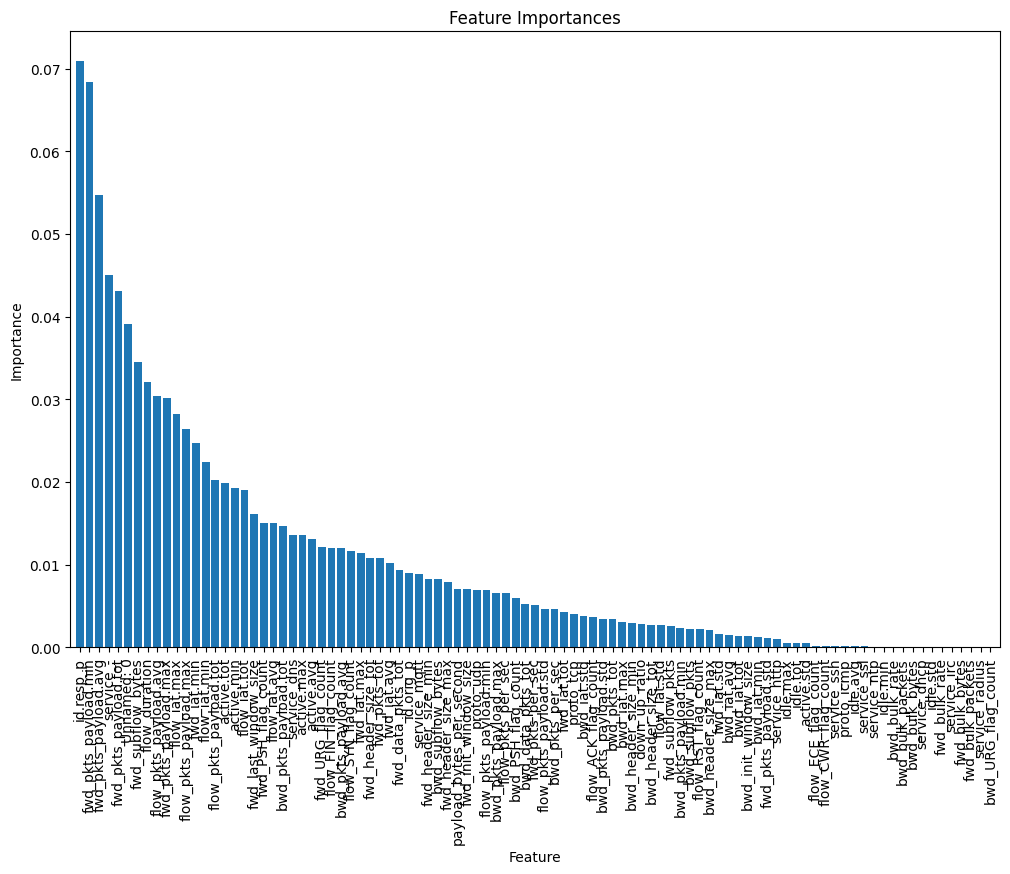

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have feature names in a list called feature_names
feature_names = X_train.columns

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


Decision Tree Visualization

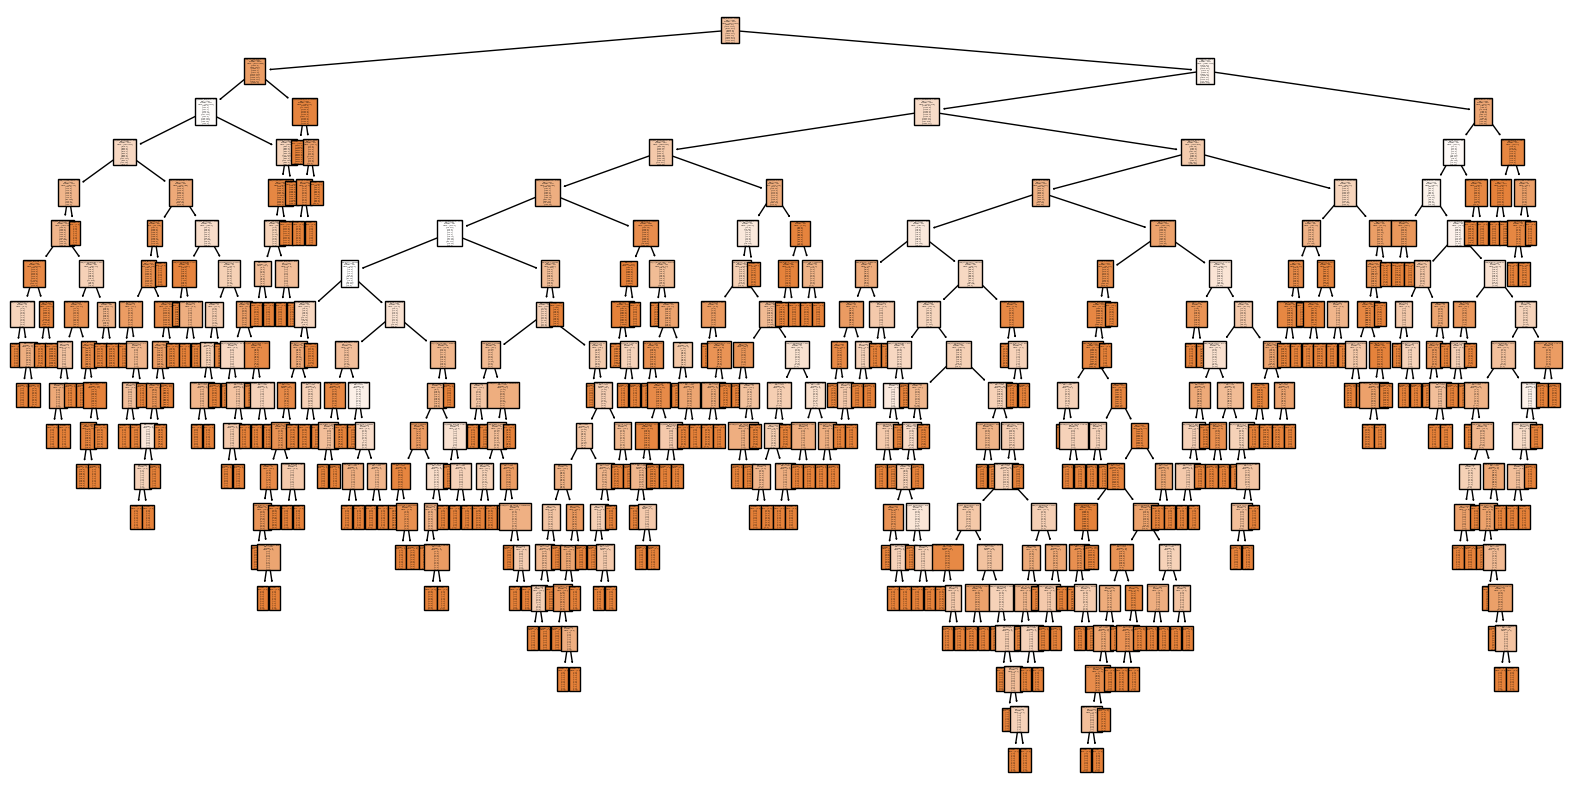

In [8]:
from sklearn.tree import plot_tree

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=feature_names, class_names=model.classes_)
plt.show()
